<a href="https://colab.research.google.com/github/yeswhos/COMP5400M-Bio-inspired-Computing/blob/master/CW2/Backpropagation%20on%20the%20Iris%20data%20set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">COMP5400 - Tensorflow Demo</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Marc de Kamps, University of Leeds</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

This notebook demonstrates the use of keras. We will first use it to create a multi-layer perceptron that can classify the iris data set.

In [0]:
# first check if all the prerequisites are there.
import tensorflow as tf
from tensorflow.keras import layers


If the previous cells came through, then all the important stuff has been installed on your machine. Now let's process the iris data set and create a 1-of-3 coding.

Load data file from google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')
filepath = "drive/My Drive/Bio/iris.data"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
inputs  = []
outputs = []

d = {}
d['Iris-setosa\n']     = [1., 0., 0.]
d['Iris-versicolor\n'] = [0., 1., 0.]
d['Iris-virginica\n']  = [0., 0., 1.]

# with open('iris.data') as f:
with open(filepath) as f:
    lines=f.readlines()
    for line in lines:
        items=line.split(',')
        if len(items) == 5:
            inp =  [float(x) for x in items[0:4] ]
            inputs.append(inp)
            out = d[items[4]]
            outputs.append(out)
            
print( len(inputs), 'input patterns', len(outputs), 'output patterns')

150 input patterns 150 output patterns


In [0]:
total = np.array(inputs)
# print(total)
set_sepal_len = total[:50:,0]
set_sepal_wid = total[:50:,1]
set_petal_len = total[:50:,2]
set_petal_wid = total[:50:,3]

versi_sepal_len = total[50:100:,0]
versi_sepal_wid = total[50:100:,1]
versi_petal_len = total[50:100:,2]
versi_petal_wid = total[50:100:,3]

virgin_sepal_len = total[100:150:,0]
virgin_sepal_wid = total[100:150:,1]
virgin_petal_len = total[100:150:,2]
virgin_petal_wid = total[100:150:,3]



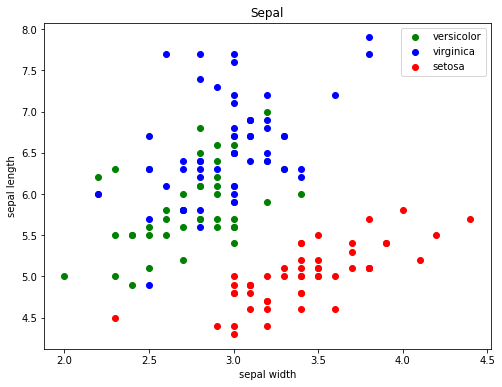

In [62]:
from pylab import *
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.title("Sepal")
plt.xlabel("sepal width")
plt.ylabel("sepal length")
p1 = plt.scatter(versi_sepal_wid, versi_sepal_len, c = 'g', marker = "o")
p2 = plt.scatter(virgin_sepal_wid, virgin_sepal_len, c = 'b', marker = "o")
p3 = plt.scatter(set_sepal_wid, set_sepal_len, c = 'r', marker = "o")
plt.tick_params(axis='both', which = 'major', labelsize=10)
plt.legend([p1, p2, p3], ['versicolor', 'virginica', 'setosa'], loc = 'upper right')

plt.show()

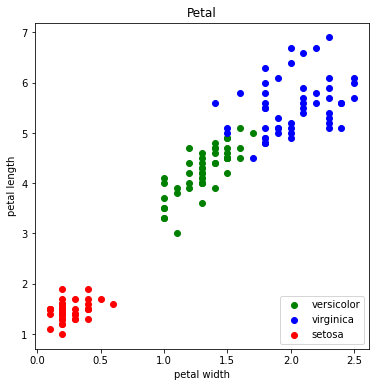

In [60]:
plt.figure(figsize=(6, 6))
plt.title("Petal")
plt.xlabel("petal width")
plt.ylabel("petal length")
p1 = plt.scatter(versi_petal_wid, versi_petal_len, c = 'g', marker = "o")
p2 = plt.scatter(virgin_petal_wid, virgin_petal_len, c = 'b', marker = "o")
p3 = plt.scatter(set_petal_wid, set_petal_len, c = 'r', marker = "o")
plt.tick_params(axis='both', which = 'major', labelsize=10)
plt.legend([p1, p2, p3], ['versicolor', 'virginica', 'setosa'], loc = 'lower right')

plt.show()

Now we build a network. A stack of layers is captured by the tf.keras.Sequential model.

In [0]:
import numpy as np
import random
ids=random.sample(range(0,len(inputs)), 100) # generate 100 random ids
train_in = []
train_out=[]
for id in ids:
    train_in.append(inputs[id])
    train_out.append(outputs[id])
train_inputs  = np.array(train_in)
train_outputs = np.array(train_out)

val_input =[]
val_output=[]
validation_ids = list(set(range(0,len(inputs))) - set(ids))
for val_id in validation_ids:
    val_input.append(inputs[val_id])
    val_output.append(outputs[val_id])
val_inputs  = np.array(val_input)
val_outputs = np.array(val_output)


In [0]:
model = tf.keras.Sequential()
# an mlp with a given number of input nodes. Four input nodes, three output nodes 
nr_hidden = 5
nr_in     = 4
nr_out    = 3 
model.add(layers.Dense(nr_in,activation='relu'))
model.add(layers.Dense(nr_hidden, activation = 'sigmoid'))
model.add(layers.Dense(nr_out,activation='sigmoid'))
model.compile(optimizer=tf.train.GradientDescentOptimizer(0.05),loss='mse')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Create training set and bring them into a numpy array form. Let's use a 100 patterns for training. Also, build a validation set.

Now train:

In [0]:
model.fit(train_inputs,train_outputs,epochs=1000,batch_size=30)

Epoch 1/1000
100/100 [==============================] - 0s 5ms/sample - loss: 0.2761
Epoch 2/1000
100/100 [==============================] - 0s 118us/sample - loss: 0.2742
Epoch 3/1000
100/100 [==============================] - 0s 111us/sample - loss: 0.2722
Epoch 4/1000
100/100 [==============================] - 0s 136us/sample - loss: 0.2702
Epoch 5/1000
100/100 [==============================] - 0s 120us/sample - loss: 0.2684
Epoch 6/1000
100/100 [==============================] - 0s 142us/sample - loss: 0.2667
Epoch 7/1000
100/100 [==============================] - 0s 123us/sample - loss: 0.2650
Epoch 8/1000
100/100 [==============================] - 0s 123us/sample - loss: 0.2633
Epoch 9/1000
100/100 [==============================] - 0s 128us/sample - loss: 0.2617
Epoch 10/1000
100/100 [==============================] - 0s 138us/sample - loss: 0.2602
Epoch 11/1000
100/100 [==============================] - 0s 128us/sample - loss: 0.2587
Epoch 12/1000
100/100 [====================

100/100 [==============================] - 0s 152us/sample - loss: 0.2193
Epoch 95/1000
100/100 [==============================] - 0s 161us/sample - loss: 0.2191
Epoch 96/1000
100/100 [==============================] - 0s 242us/sample - loss: 0.2189
Epoch 97/1000
100/100 [==============================] - 0s 176us/sample - loss: 0.2187
Epoch 98/1000
100/100 [==============================] - 0s 160us/sample - loss: 0.2185
Epoch 99/1000
100/100 [==============================] - 0s 198us/sample - loss: 0.2183
Epoch 100/1000
100/100 [==============================] - 0s 201us/sample - loss: 0.2181
Epoch 101/1000
100/100 [==============================] - 0s 175us/sample - loss: 0.2178
Epoch 102/1000
100/100 [==============================] - 0s 167us/sample - loss: 0.2176
Epoch 103/1000
100/100 [==============================] - 0s 110us/sample - loss: 0.2174
Epoch 104/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.2172
Epoch 105/1000
100/100 [=================

100/100 [==============================] - 0s 166us/sample - loss: 0.1999
Epoch 187/1000
100/100 [==============================] - 0s 229us/sample - loss: 0.1997
Epoch 188/1000
100/100 [==============================] - 0s 143us/sample - loss: 0.1994
Epoch 189/1000
100/100 [==============================] - 0s 155us/sample - loss: 0.1992
Epoch 190/1000
100/100 [==============================] - 0s 147us/sample - loss: 0.1990
Epoch 191/1000
100/100 [==============================] - 0s 90us/sample - loss: 0.1987
Epoch 192/1000
100/100 [==============================] - 0s 124us/sample - loss: 0.1985
Epoch 193/1000
100/100 [==============================] - 0s 129us/sample - loss: 0.1983
Epoch 194/1000
100/100 [==============================] - 0s 122us/sample - loss: 0.1980
Epoch 195/1000
100/100 [==============================] - 0s 137us/sample - loss: 0.1977
Epoch 196/1000
100/100 [==============================] - 0s 202us/sample - loss: 0.1975
Epoch 197/1000
100/100 [=============

Epoch 278/1000
100/100 [==============================] - 0s 192us/sample - loss: 0.1720
Epoch 279/1000
100/100 [==============================] - 0s 243us/sample - loss: 0.1717
Epoch 280/1000
100/100 [==============================] - 0s 241us/sample - loss: 0.1713
Epoch 281/1000
100/100 [==============================] - 0s 191us/sample - loss: 0.1710
Epoch 282/1000
100/100 [==============================] - 0s 252us/sample - loss: 0.1707
Epoch 283/1000
100/100 [==============================] - 0s 186us/sample - loss: 0.1704
Epoch 284/1000
100/100 [==============================] - 0s 241us/sample - loss: 0.1700
Epoch 285/1000
100/100 [==============================] - 0s 242us/sample - loss: 0.1697
Epoch 286/1000
100/100 [==============================] - 0s 213us/sample - loss: 0.1694
Epoch 287/1000
100/100 [==============================] - 0s 188us/sample - loss: 0.1691
Epoch 288/1000
100/100 [==============================] - 0s 239us/sample - loss: 0.1688
Epoch 289/1000
100/10

100/100 [==============================] - 0s 100us/sample - loss: 0.1473
Epoch 371/1000
100/100 [==============================] - 0s 136us/sample - loss: 0.1471
Epoch 372/1000
100/100 [==============================] - 0s 128us/sample - loss: 0.1469
Epoch 373/1000
100/100 [==============================] - 0s 118us/sample - loss: 0.1467
Epoch 374/1000
100/100 [==============================] - 0s 154us/sample - loss: 0.1465
Epoch 375/1000
100/100 [==============================] - 0s 202us/sample - loss: 0.1463
Epoch 376/1000
100/100 [==============================] - 0s 107us/sample - loss: 0.1462
Epoch 377/1000
100/100 [==============================] - 0s 143us/sample - loss: 0.1460
Epoch 378/1000
100/100 [==============================] - 0s 156us/sample - loss: 0.1458
Epoch 379/1000
100/100 [==============================] - 0s 163us/sample - loss: 0.1456
Epoch 380/1000
100/100 [==============================] - 0s 169us/sample - loss: 0.1454
Epoch 381/1000
100/100 [============

100/100 [==============================] - 0s 196us/sample - loss: 0.1336
Epoch 463/1000
100/100 [==============================] - 0s 138us/sample - loss: 0.1335
Epoch 464/1000
100/100 [==============================] - 0s 110us/sample - loss: 0.1334
Epoch 465/1000
100/100 [==============================] - 0s 162us/sample - loss: 0.1332
Epoch 466/1000
100/100 [==============================] - 0s 137us/sample - loss: 0.1332
Epoch 467/1000
100/100 [==============================] - 0s 104us/sample - loss: 0.1330
Epoch 468/1000
100/100 [==============================] - 0s 154us/sample - loss: 0.1329
Epoch 469/1000
100/100 [==============================] - 0s 159us/sample - loss: 0.1328
Epoch 470/1000
100/100 [==============================] - 0s 140us/sample - loss: 0.1327
Epoch 471/1000
100/100 [==============================] - 0s 242us/sample - loss: 0.1326
Epoch 472/1000
100/100 [==============================] - 0s 181us/sample - loss: 0.1325
Epoch 473/1000
100/100 [============

100/100 [==============================] - 0s 146us/sample - loss: 0.1256
Epoch 555/1000
100/100 [==============================] - 0s 179us/sample - loss: 0.1256
Epoch 556/1000
100/100 [==============================] - 0s 136us/sample - loss: 0.1255
Epoch 557/1000
100/100 [==============================] - 0s 159us/sample - loss: 0.1254
Epoch 558/1000
100/100 [==============================] - 0s 200us/sample - loss: 0.1254
Epoch 559/1000
100/100 [==============================] - 0s 232us/sample - loss: 0.1253
Epoch 560/1000
100/100 [==============================] - 0s 168us/sample - loss: 0.1252
Epoch 561/1000
100/100 [==============================] - 0s 179us/sample - loss: 0.1252
Epoch 562/1000
100/100 [==============================] - 0s 201us/sample - loss: 0.1251
Epoch 563/1000
100/100 [==============================] - 0s 230us/sample - loss: 0.1250
Epoch 564/1000
100/100 [==============================] - 0s 220us/sample - loss: 0.1250
Epoch 565/1000
100/100 [============

Epoch 646/1000
100/100 [==============================] - 0s 138us/sample - loss: 0.1204
Epoch 647/1000
100/100 [==============================] - 0s 168us/sample - loss: 0.1203
Epoch 648/1000
100/100 [==============================] - 0s 201us/sample - loss: 0.1202
Epoch 649/1000
100/100 [==============================] - 0s 126us/sample - loss: 0.1202
Epoch 650/1000
100/100 [==============================] - 0s 146us/sample - loss: 0.1202
Epoch 651/1000
100/100 [==============================] - 0s 165us/sample - loss: 0.1201
Epoch 652/1000
100/100 [==============================] - 0s 149us/sample - loss: 0.1200
Epoch 653/1000
100/100 [==============================] - 0s 185us/sample - loss: 0.1200
Epoch 654/1000
100/100 [==============================] - 0s 143us/sample - loss: 0.1199
Epoch 655/1000
100/100 [==============================] - 0s 104us/sample - loss: 0.1199
Epoch 656/1000
100/100 [==============================] - 0s 146us/sample - loss: 0.1198
Epoch 657/1000
100/10

100/100 [==============================] - 0s 135us/sample - loss: 0.1162
Epoch 739/1000
100/100 [==============================] - 0s 96us/sample - loss: 0.1162
Epoch 740/1000
100/100 [==============================] - 0s 111us/sample - loss: 0.1161
Epoch 741/1000
100/100 [==============================] - 0s 107us/sample - loss: 0.1161
Epoch 742/1000
100/100 [==============================] - 0s 129us/sample - loss: 0.1160
Epoch 743/1000
100/100 [==============================] - 0s 93us/sample - loss: 0.1160
Epoch 744/1000
100/100 [==============================] - 0s 130us/sample - loss: 0.1160
Epoch 745/1000
100/100 [==============================] - 0s 133us/sample - loss: 0.1159
Epoch 746/1000
100/100 [==============================] - 0s 147us/sample - loss: 0.1159
Epoch 747/1000
100/100 [==============================] - 0s 174us/sample - loss: 0.1158
Epoch 748/1000
100/100 [==============================] - 0s 140us/sample - loss: 0.1158
Epoch 749/1000
100/100 [==============

100/100 [==============================] - 0s 122us/sample - loss: 0.1123
Epoch 831/1000
100/100 [==============================] - 0s 120us/sample - loss: 0.1123
Epoch 832/1000
100/100 [==============================] - 0s 152us/sample - loss: 0.1123
Epoch 833/1000
100/100 [==============================] - 0s 157us/sample - loss: 0.1122
Epoch 834/1000
100/100 [==============================] - 0s 245us/sample - loss: 0.1122
Epoch 835/1000
100/100 [==============================] - 0s 149us/sample - loss: 0.1122
Epoch 836/1000
100/100 [==============================] - 0s 115us/sample - loss: 0.1121
Epoch 837/1000
100/100 [==============================] - 0s 190us/sample - loss: 0.1121
Epoch 838/1000
100/100 [==============================] - 0s 168us/sample - loss: 0.1122
Epoch 839/1000
100/100 [==============================] - 0s 136us/sample - loss: 0.1120
Epoch 840/1000
100/100 [==============================] - 0s 172us/sample - loss: 0.1119
Epoch 841/1000
100/100 [============

Epoch 922/1000
100/100 [==============================] - 0s 135us/sample - loss: 0.1083
Epoch 923/1000
100/100 [==============================] - 0s 137us/sample - loss: 0.1082
Epoch 924/1000
100/100 [==============================] - 0s 162us/sample - loss: 0.1081
Epoch 925/1000
100/100 [==============================] - 0s 88us/sample - loss: 0.1080
Epoch 926/1000
100/100 [==============================] - 0s 131us/sample - loss: 0.1080
Epoch 927/1000
100/100 [==============================] - 0s 187us/sample - loss: 0.1079
Epoch 928/1000
100/100 [==============================] - 0s 128us/sample - loss: 0.1079
Epoch 929/1000
100/100 [==============================] - 0s 194us/sample - loss: 0.1078
Epoch 930/1000
100/100 [==============================] - 0s 134us/sample - loss: 0.1078
Epoch 931/1000
100/100 [==============================] - 0s 102us/sample - loss: 0.1077
Epoch 932/1000
100/100 [==============================] - 0s 163us/sample - loss: 0.1077
Epoch 933/1000
100/100

In [0]:
model.predict(val_inputs[10:15])

array([[0.07488355, 0.47208285, 0.5675444 ],
       [0.8747479 , 0.16404748, 0.04982197],
       [0.07823583, 0.47662747, 0.54337955],
       [0.07678944, 0.47419432, 0.5550826 ],
       [0.08002622, 0.47882888, 0.5310854 ]], dtype=float32)

In [0]:
print(val_outputs[10:15])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
